In [69]:
# Import pandas(for making data tables)
import pandas as pd
import numpy as np

# Graphing modules
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from matplotlib import mlab as ml
import seaborn as sns

# Makes plots in notebook
%matplotlib inline

In [70]:
# Create a Dataframe and drop extra column
df = pd.read_csv('./data/features_seattle_911_no_dup.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.Datetime = pd.to_datetime(df.Datetime)

In [71]:
# Examine head of the DataFrame
df.head()

Address                     Type            Datetime  \
0           6900 37th Av S           Medic Response 2011-11-09 23:33:00   
1  N 50th St / Stone Way N             Aid Response 2011-11-09 23:32:00   
2  E John St / E Olive Way             Aid Response 2011-11-09 23:32:00   
3            611 12th Av S             Aid Response 2011-11-09 23:29:00   
4          4545 42nd Av Sw  Automatic Medical Alarm 2011-11-09 23:25:00   

    Latitude   Longitude           Report Location Incident Number  \
0  47.540683 -122.286131  (47.540683, -122.286131)      F110104166   
1  47.665034 -122.340207  (47.665034, -122.340207)      F110104164   
2  47.619575 -122.324257  (47.619575, -122.324257)      F110104165   
3  47.597406 -122.317228  (47.597406, -122.317228)      F110104162   
4  47.562472 -122.385455  (47.562472, -122.385455)      F110104161   

                  dt_crop        date      time    ...     trav_holiday  \
0  11/09/2011 11:33:00 PM  2011-11-09  23:33:00    ...                0   
1  11/09/2011 11:32:00 PM  2011-11-09  23:32:00    ...                0   
2  11/09/2011 11:32:00 PM  2011-11-09  23:32:00    ...                0   
3  11/09/2011 11:29:00 PM  2011-11-09  23:29:00    ...                0   
4  11/09/2011 11:25:00 PM  2011-11-09  23:25:00    ...                0   

  dang_holiday    weekday  night  Monday  Saturday  Sunday Thursday  Tuesday  \
0            0  Wednesday      1       0         0       0        0        0   
1            0  Wednesday      1       0         0       0        0        0   
2            0  Wednesday      1       0         0       0        0        0   
3            0  Wednesday      1       0         0       0        0        0   
4            0  Wednesday      1       0         0       0        0        0   

   Wednesday  
0          1  
1          1  
2          1  
3          1  
4          1  

[5 rows x 25 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551095 entries, 0 to 551094
Data columns (total 25 columns):
Address            551086 non-null object
Type               551095 non-null object
Datetime           551095 non-null datetime64[ns]
Latitude           551095 non-null float64
Longitude          551095 non-null float64
Report Location    520631 non-null object
Incident Number    522111 non-null object
dt_crop            551095 non-null object
date               551095 non-null object
time               551095 non-null object
date2              551095 non-null object
time2              551095 non-null object
mariners_home      551095 non-null int64
seahawks_home      551095 non-null int64
sounders_home      551095 non-null int64
trav_holiday       551095 non-null int64
dang_holiday       551095 non-null int64
weekday            551095 non-null object
night              551095 non-null int64
Monday             551095 non-null int64
Saturday           551095 non-null int64
Sunda

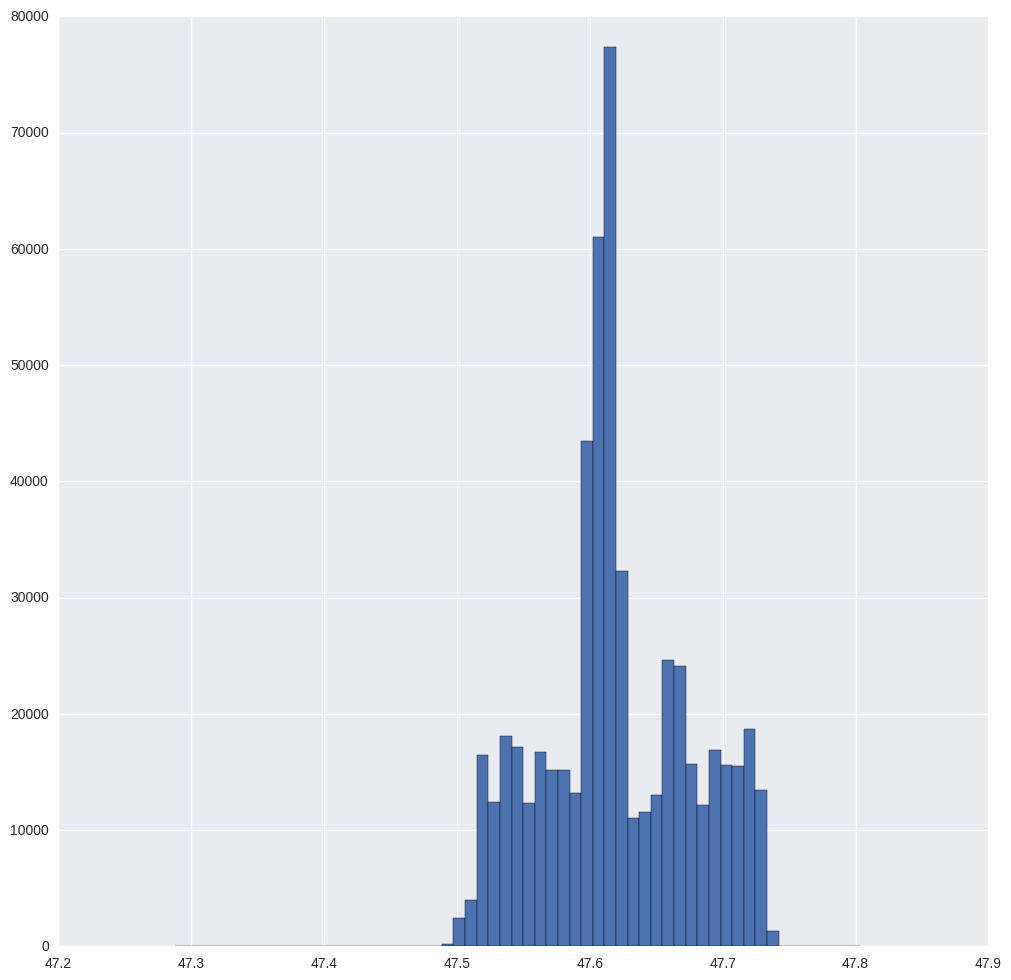

In [73]:
plt.figure(figsize=(12,12))
df.Latitude.hist(bins=60);

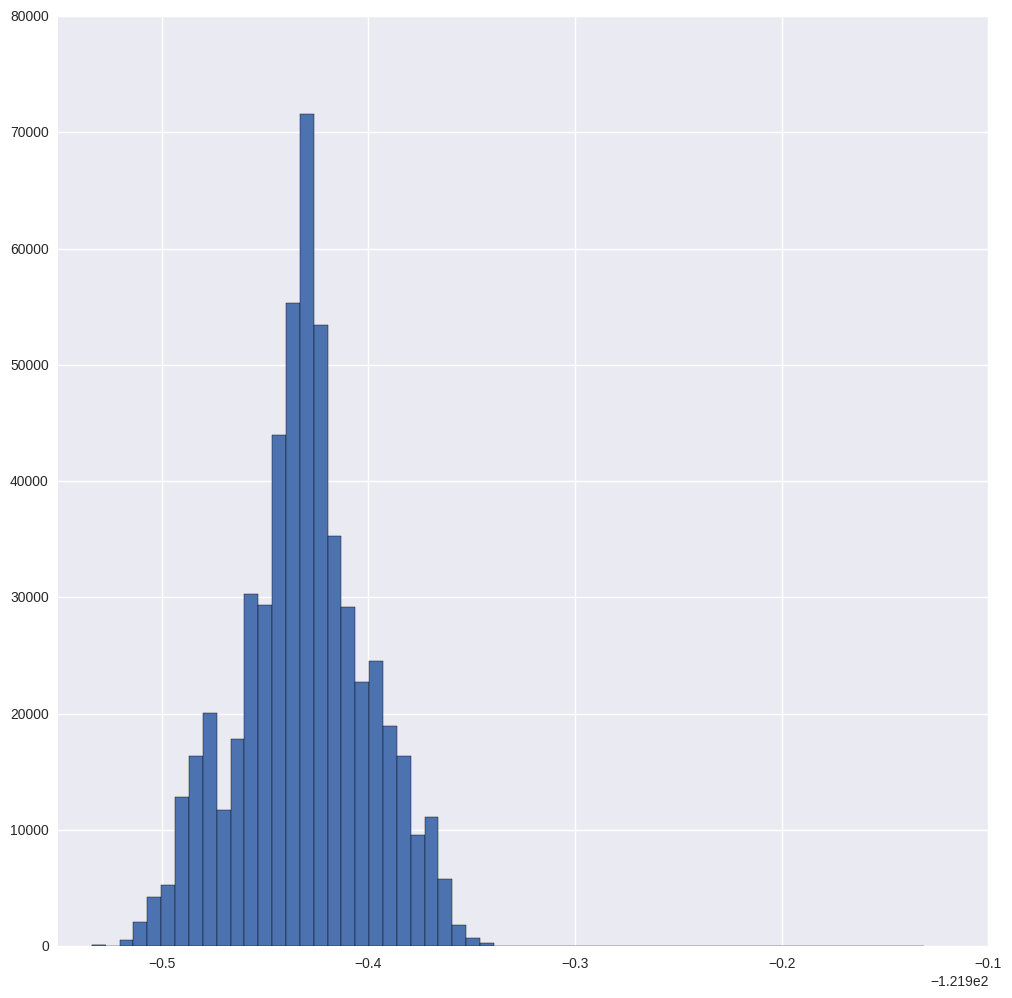

In [74]:
plt.figure(figsize=(12,12))
df.Longitude.hist(bins=60);

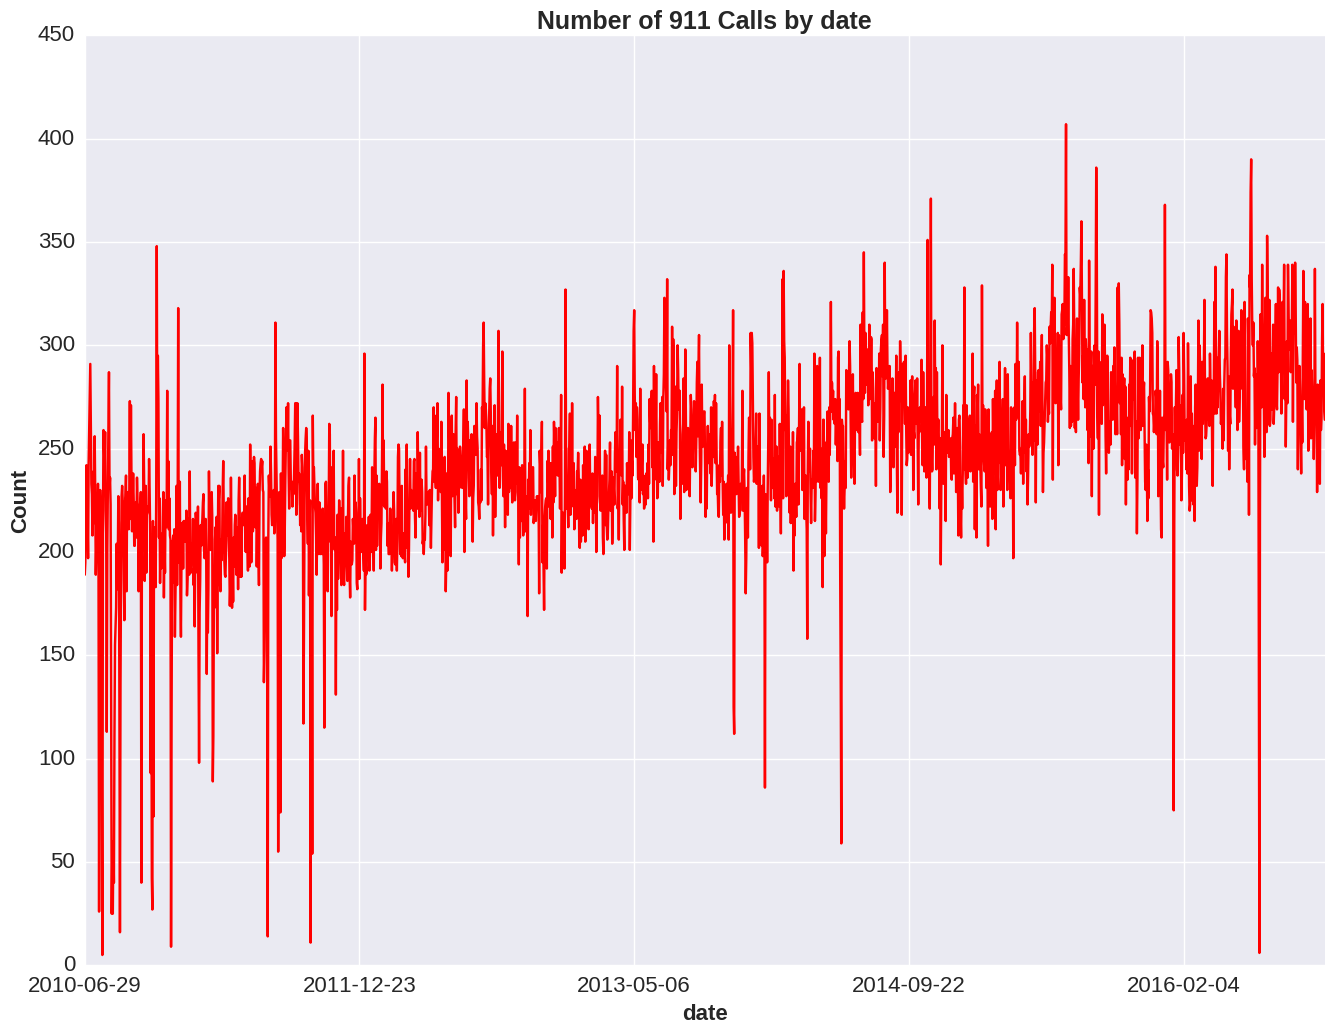

In [75]:
# 911 call counts by day
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');

In [76]:
# Days in dataset
len(df.groupby(by='date').Datetime.count())

2258

(0, 200)

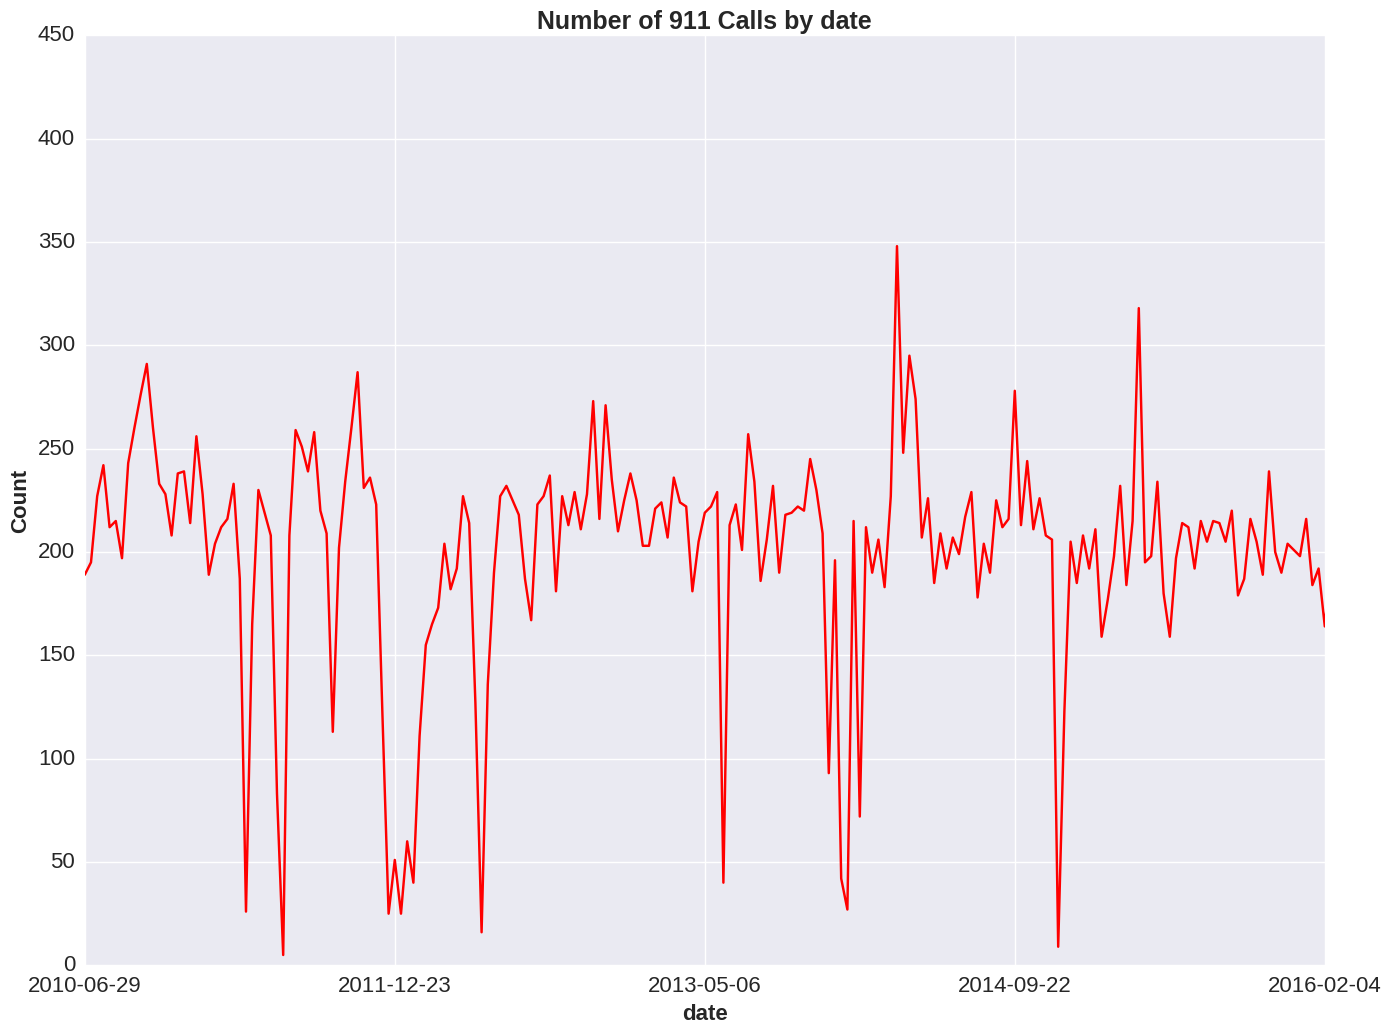

In [77]:
# 
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');
plt.xlim(0, 200)

(1200, 2200)

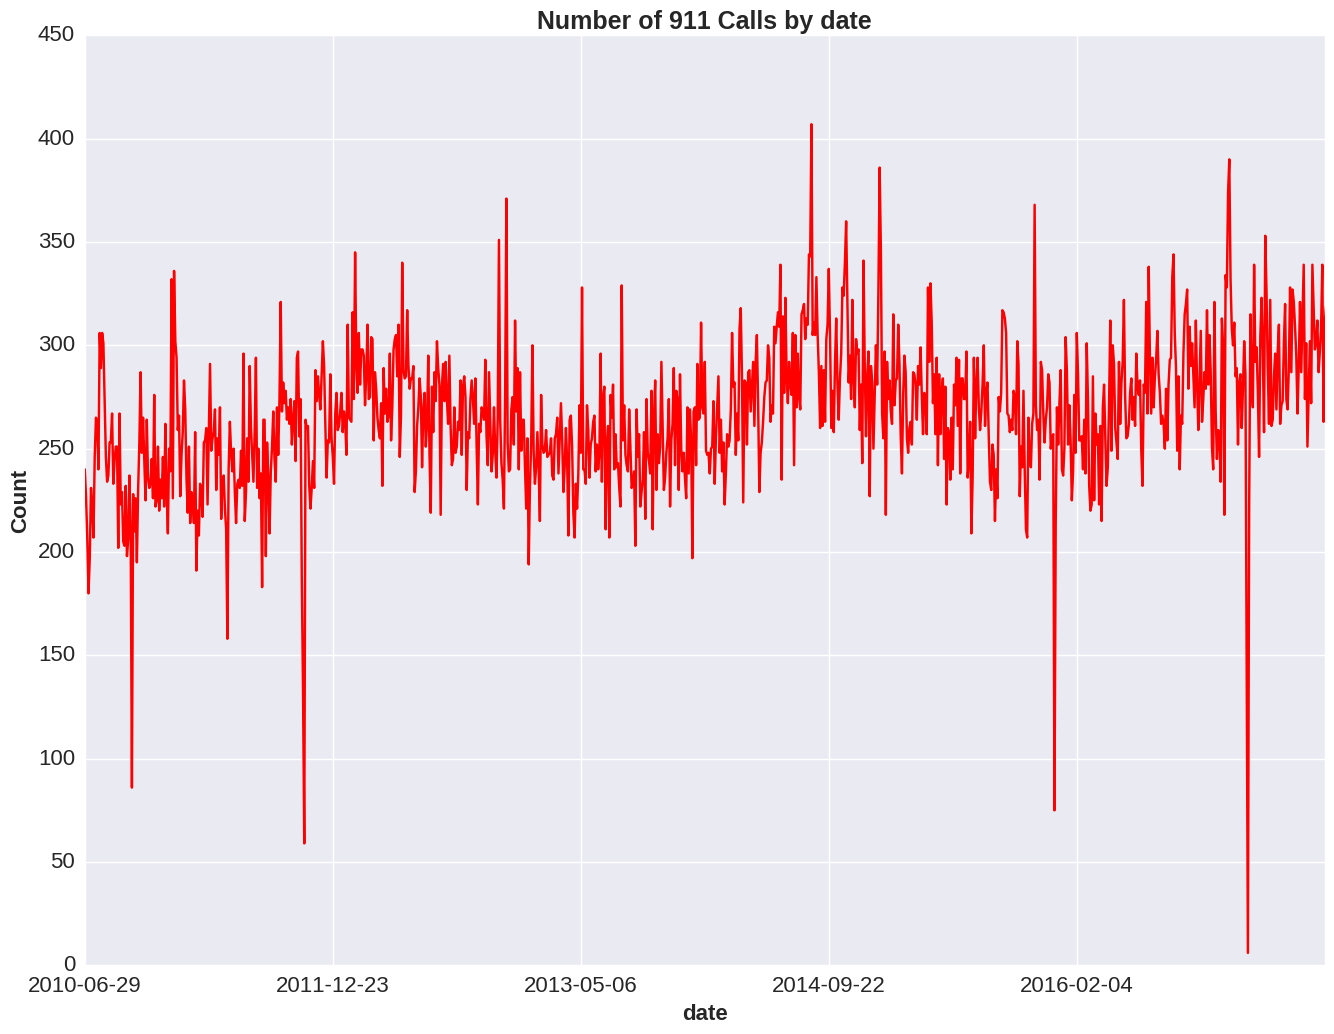

In [79]:
plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('Number of 911 Calls by date', fontsize=18, fontweight='bold')
df.groupby(by='date').Datetime.count().plot(color='r');
plt.xlim(1200, 2200)

In [80]:
df.Datetime.min()

Timestamp('2010-06-29 01:00:00')

In [81]:
df.Datetime.max()

Timestamp('2016-10-19 00:59:00')

In [83]:
# Days with extremely low values. Data capture problem?
df.groupby(by='date').Datetime.count().sort_values().head(10)

date
2010-07-31     5
2016-06-21     6
2010-12-19     9
2011-09-18    11
2011-06-21    14
2010-09-03    16
2010-08-21    25
2010-08-19    25
2010-07-25    26
2010-11-15    27
Name: Datetime, dtype: int64

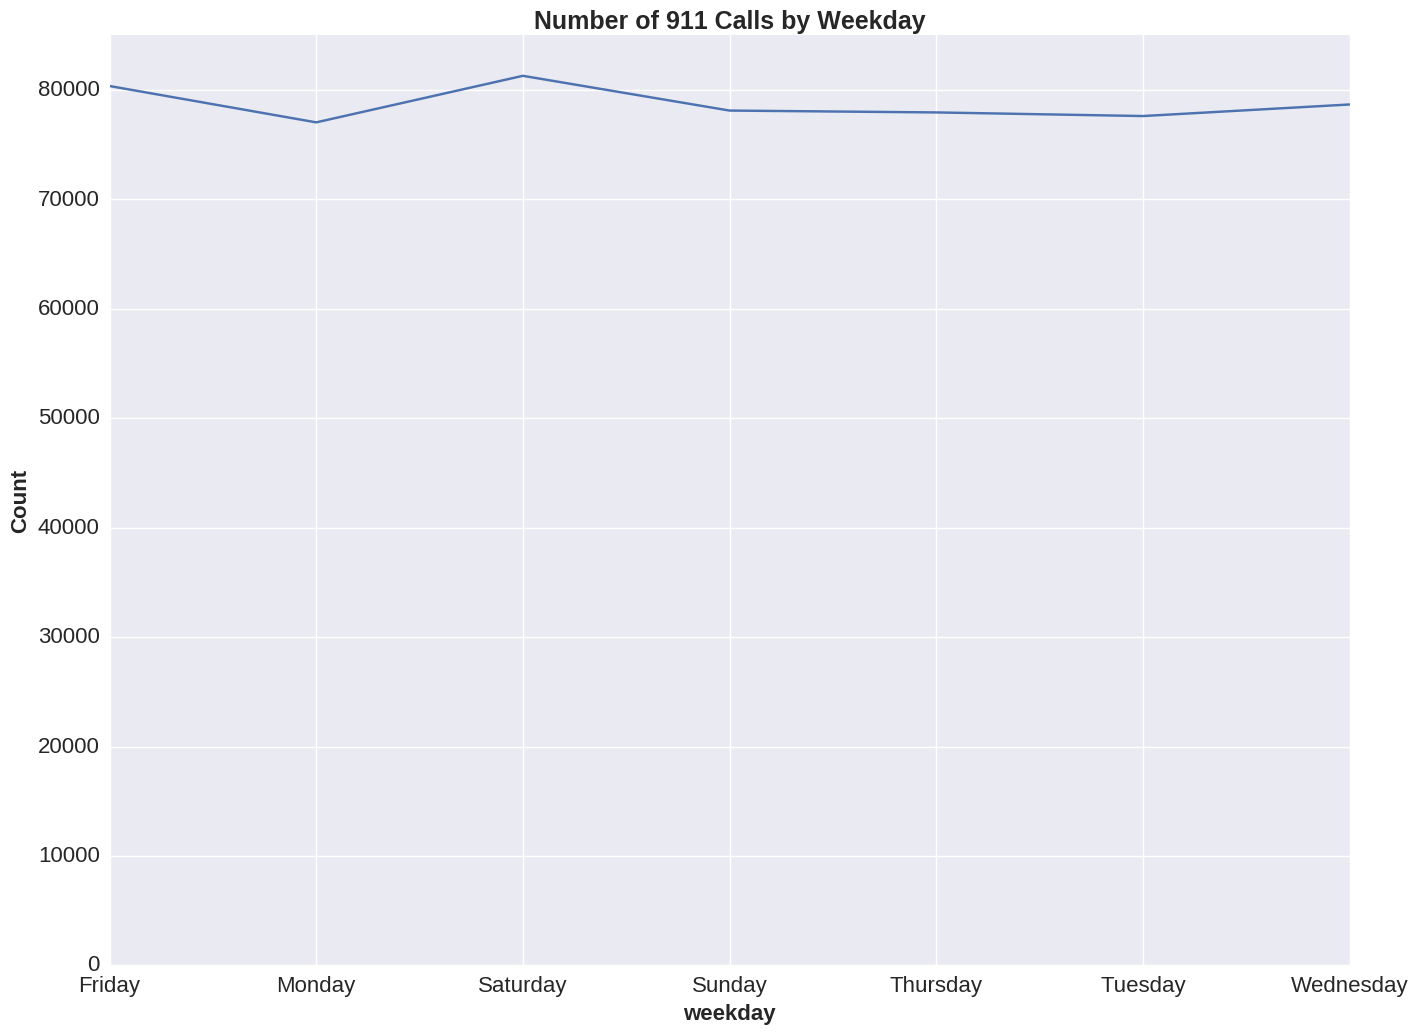

In [84]:
# Friday and Saturday are slightly more active

plt.figure(figsize=(16,12))
plt.xticks(fontsize=16)
plt.xlabel('Weekday', fontsize=16, fontweight='bold')
plt.yticks(fontsize=16)
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.ylim(0,85000)
plt.title('Number of 911 Calls by Weekday', fontsize=18, fontweight='bold')
df.groupby(by='weekday').Latitude.count().plot();

In [16]:
# Nighttime is more active
df[df.night == 1].groupby(by='date').Latitude.count().mean()

140.5571302037201

In [17]:
df[df.night == 0].groupby(by='date').Latitude.count().mean()

103.96663701067615

In [18]:
# Total dates
df.date.nunique()

2258

In [19]:
# Average daily 911 medical calls on game days
df.groupby(by='date').Latitude.count().mean()

244.06333038086802

In [94]:
counts = df.groupby(by='date').Latitude.count()
mean = counts.mean()
std = counts.std()

def find_dev(count):
    diff = count - mean
    devs = diff / std
    return 'count: {}   diff: {}   devs: {}'.format(count, diff, devs)    

In [95]:
# Travel holiday calls
hol_calls = df[df.trav_holiday == 1].groupby(by='date').Latitude.count().mean()
find_dev(hol_calls)

'count: 222.305555556   diff: -21.7577748253   devs: -0.51225762066'

In [98]:
not_hol_calls = df[df.trav_holiday == 0].groupby(by='date').Latitude.count().mean()
find_dev(not_hol_calls)

'count: 244.415841584   diff: 0.35251120329   devs: 0.00829940339503'

In [100]:
# Danger holiday calls
dang_hol = df[df.dang_holiday == 1].groupby(by='date').Latitude.count().mean()
find_dev(dang_hol)

'count: 280.846153846   diff: 36.7828234653   devs: 0.866002235098'

In [106]:
df[df.weekday == 'Monday'].groupby(by='').Latitude.count()

weekday
Monday    77045
Name: Latitude, dtype: int64

In [104]:
# Days split into two dates
mon = df[df.weekday == 'Monday'].groupby(by='weekday').Latitude.count().mean()
tue = 2 *df[df.weekday == 'Tuesday'].groupby(by='date').Latitude.count().mean()
wed = 2 *df[df.weekday == 'Wednesday'].groupby(by='date').Latitude.count().mean()
thu = df[df.weekday == 'Thursday'].groupby(by='date').Latitude.count().mean()
fri = df[df.weekday == 'Friday'].groupby(by='date').Latitude.count().mean()
sat = df[df.weekday == 'Saturday'].groupby(by='date').Latitude.count().mean()
sun = df[df.weekday == 'Sunday'].groupby(by='date').Latitude.count().mean()

for day in [mon, tue, wed, thu, fri, sat, sun]:
    print find_dev(day)

count: 121.139937107   diff: -122.923393274   devs: -2.89406639546
count: 120.908099688   diff: -123.155230692   devs: -2.89952469647
count: 122.365474339   diff: -121.697856042   devs: -2.86521276536
count: 121.234836703   diff: -122.828493678   devs: -2.89183211178
count: 124.98911353   diff: -119.074216851   devs: -2.80344270016
count: 126.635514019   diff: -117.427816362   devs: -2.76468040927
count: 122.643642072   diff: -121.419688309   devs: -2.85866367924


In [102]:
seahawks = df[df.seahawks_home == 1].Datetime.resample.count().mean()
mariners = df[df.mariners_home == 1].groupby(by='date').Latitude.count().mean()
sounders = df[df.sounders_home == 1].groupby(by='date').Latitude.count().mean()

for team in [seahawks, mariners, sounders]:
    print find_dev(team)

count: 235.75   diff: -8.31333038087   devs: -0.195726211658
count: 250.533225284   diff: 6.46989490276   devs: 0.152324996256
count: 254.933333333   diff: 10.8700029525   devs: 0.255919637633


In [67]:
hol_lst2 = ['2010-01-01', '2010-07-04', '2011-01-01', '2011-07-04', 
            '2012-01-01', '2012-07-04', '2013-01-01', '2013-07-04', 
            '2014-01-01', '2014-07-04', '2015-01-01', '2015-07-04', 
            '2016-01-01', '2016-07-04']

In [68]:
for hol in hol_lst2:
    try:
        info = check_date(hol)
        print hol, '\t', info
    except KeyError:
        print hol, '\t' 'not in dataset'

2010-01-01 	not in dataset
2010-07-04 	Diff: -29.0633303809	 Devs: -0.684257125964
2011-01-01 	Diff: 73.9366696191	 Devs: 1.74073970168
2011-07-04 	Diff: -18.0633303809	 Devs: -0.425276882236
2012-01-01 	Diff: 51.9366696191	 Devs: 1.22277921422
2012-07-04 	Diff: -28.0633303809	 Devs: -0.660713467444
2013-01-01 	Diff: 82.9366696191	 Devs: 1.95263262837
2013-07-04 	Diff: 23.9366696191	 Devs: 0.563556775638
2014-01-01 	Diff: -33.0633303809	 Devs: -0.778431760048
2014-07-04 	Diff: 32.9366696191	 Devs: 0.775449702325
2015-01-01 	Diff: 83.9366696191	 Devs: 1.97617628689
2015-07-04 	Diff: 98.9366696191	 Devs: 2.3293311647
2016-01-01 	Diff: 123.936669619	 Devs: 2.91792262772
2016-07-04 	Diff: 13.9366696191	 Devs: 0.32812019043


In [51]:
counts

date
2010-06-29    189
2010-06-30    195
2010-07-01    227
2010-07-02    242
2010-07-03    212
2010-07-04    215
2010-07-05    197
2010-07-06    243
2010-07-07    260
2010-07-08    276
2010-07-09    291
2010-07-10    260
2010-07-11    233
2010-07-12    228
2010-07-13    208
2010-07-14    238
2010-07-15    239
2010-07-16    214
2010-07-17    256
2010-07-18    228
2010-07-19    189
2010-07-20    204
2010-07-21    212
2010-07-22    216
2010-07-23    233
2010-07-24    187
2010-07-25     26
2010-07-26    165
2010-07-27    230
2010-07-28    219
             ... 
2016-09-19    265
2016-09-20    268
2016-09-21    280
2016-09-22    313
2016-09-23    255
2016-09-24    288
2016-09-25    278
2016-09-26    264
2016-09-27    267
2016-09-28    245
2016-09-29    264
2016-09-30    337
2016-10-01    270
2016-10-02    265
2016-10-03    275
2016-10-04    229
2016-10-05    281
2016-10-06    275
2016-10-07    263
2016-10-08    274
2016-10-09    233
2016-10-10    283
2016-10-11    259
2016-10-12    265
2016-

In [11]:
# Restrict Latitude and Longitude ranges for tighter plots
df = df[((df['Latitude'] < 47.77) & (df['Latitude'] > 47.47))]
df = df[((df['Longitude'] < -122.25) & (df['Longitude'] > -122.55))]

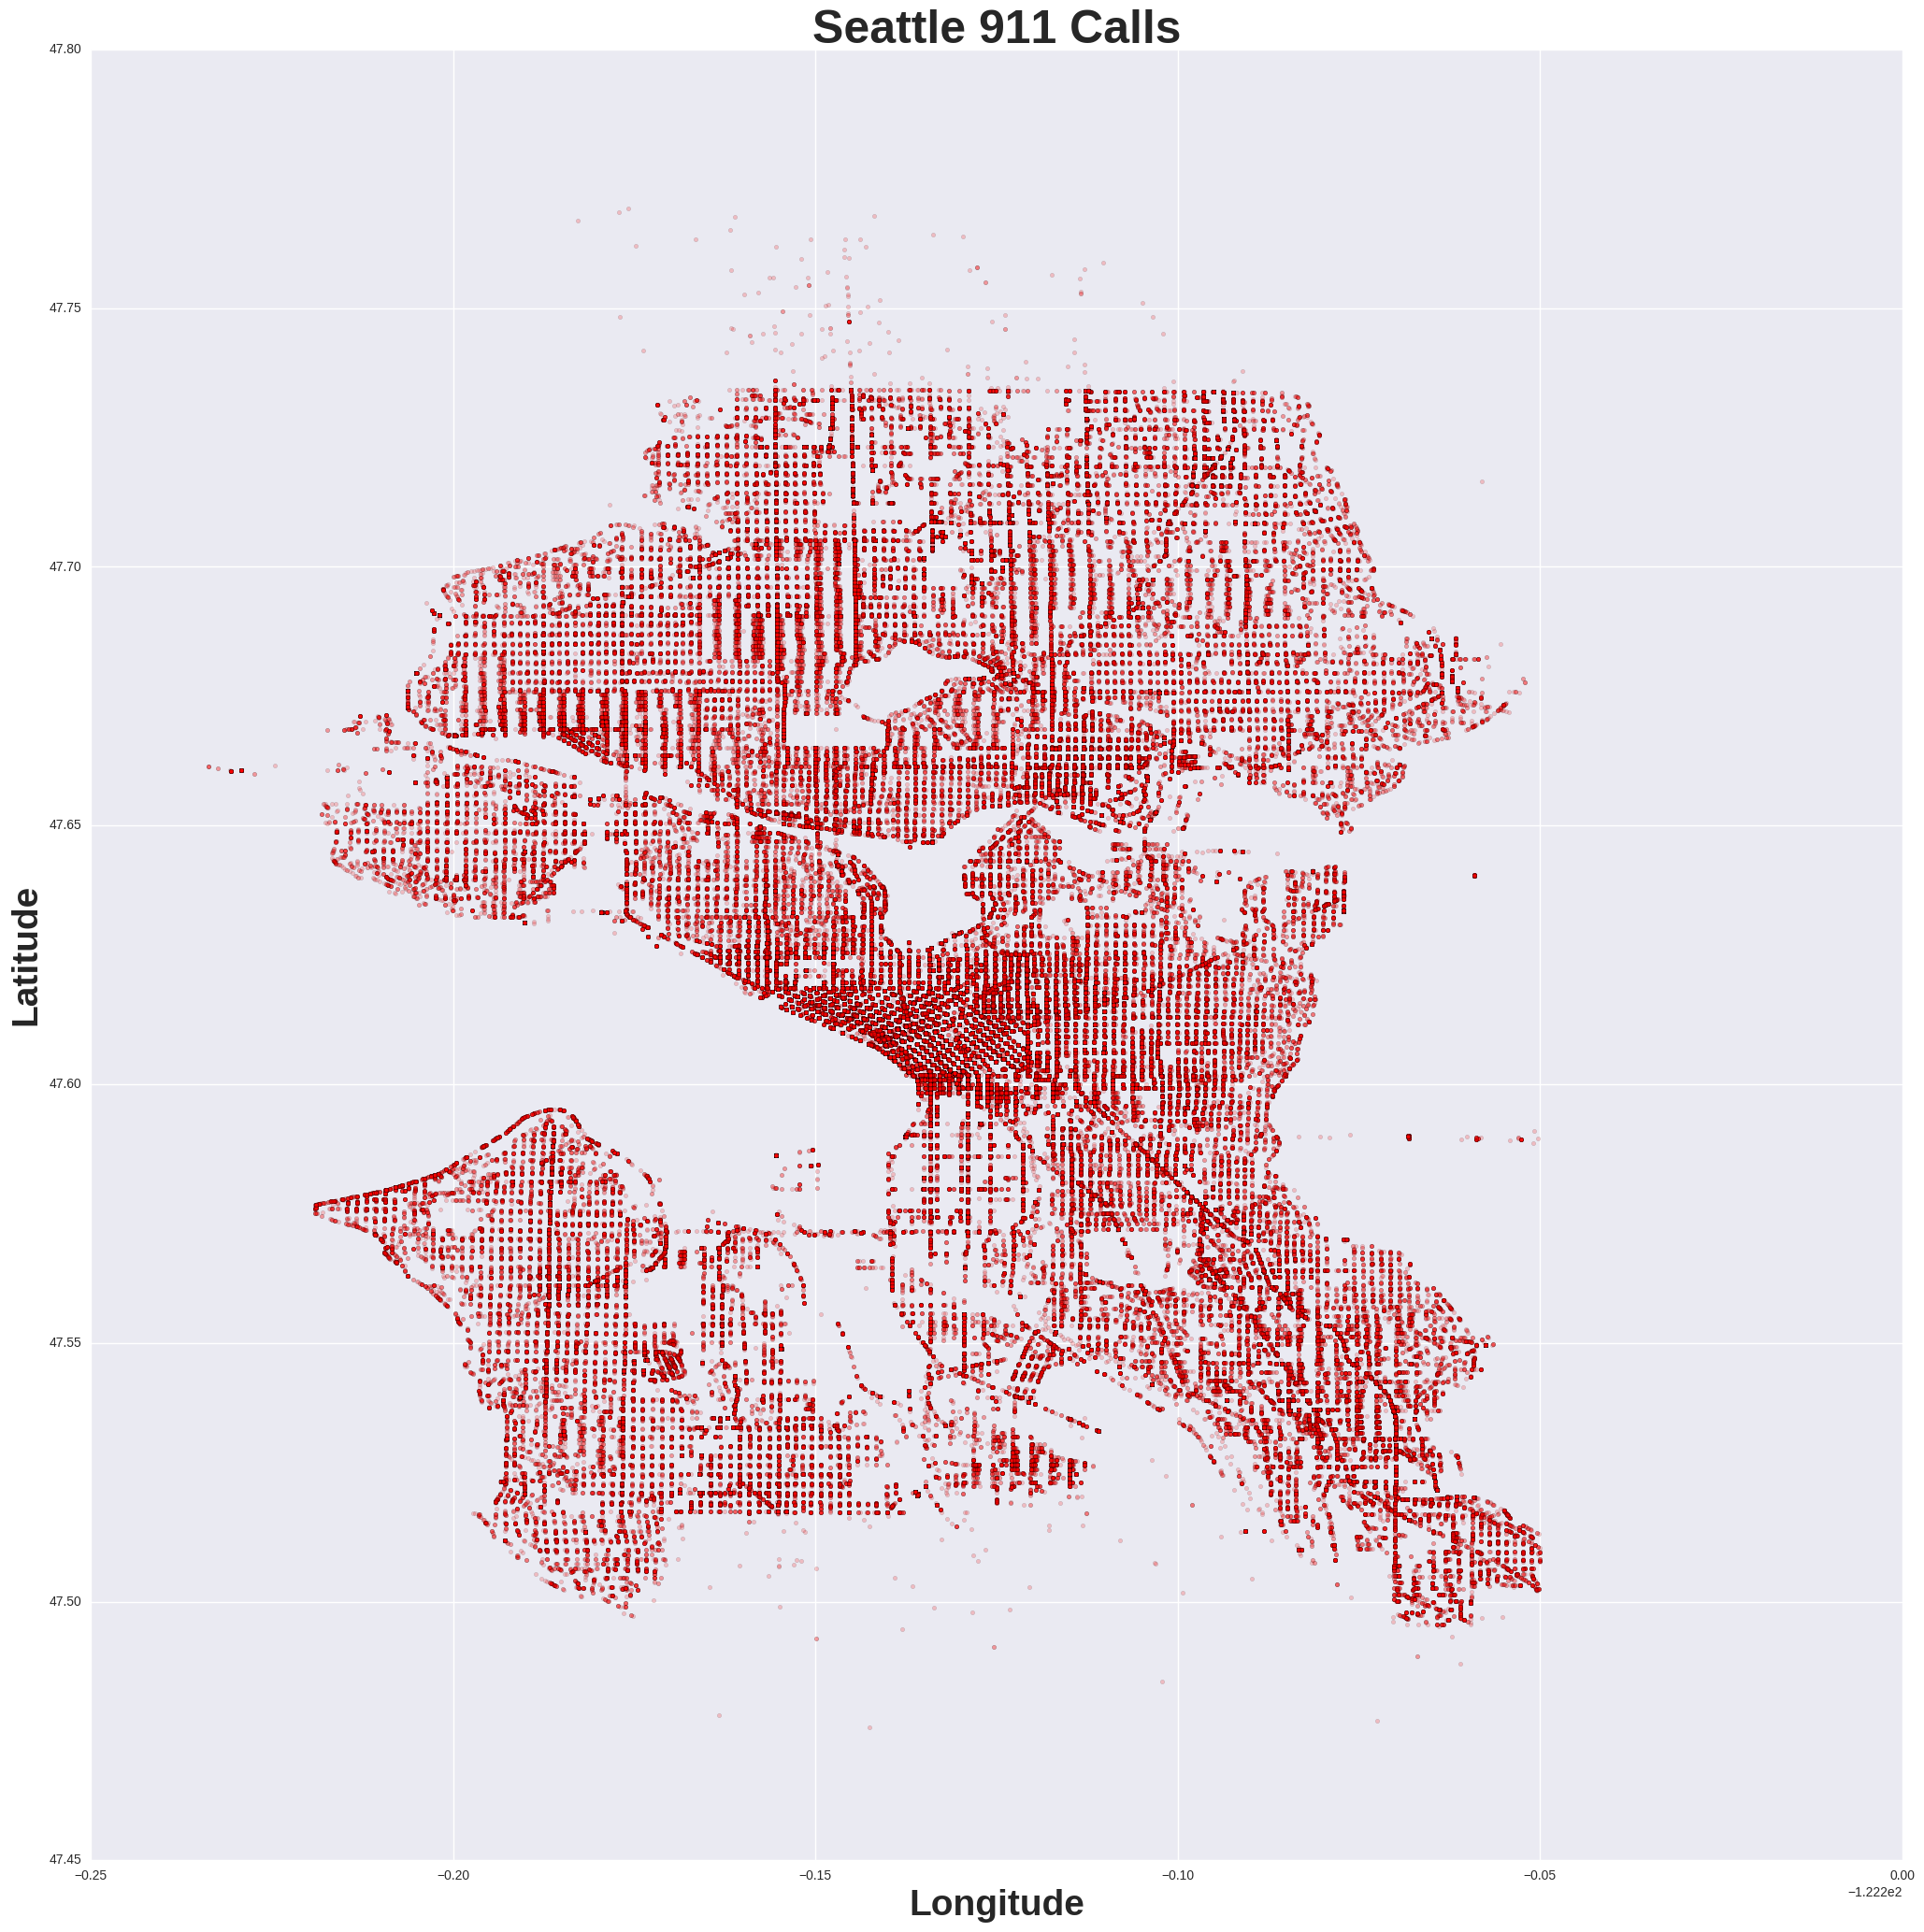

In [12]:
# Create and save a scatter plot (map) of 911 calls
df.plot(kind="scatter", x="Longitude", y="Latitude", color='r', s=10, alpha=0.2, figsize=(25,25))
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')
plt.savefig('seattle_911.png')

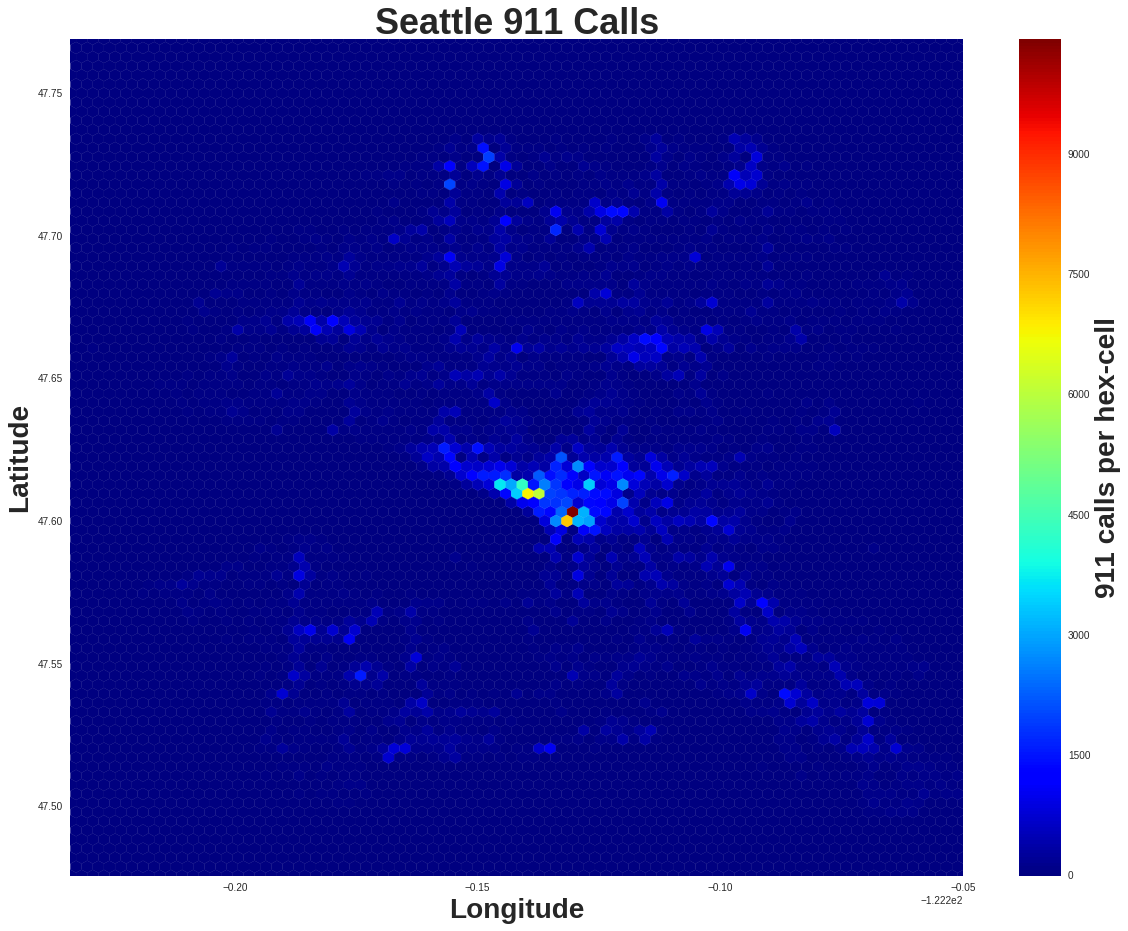

In [10]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# If 'bins=None', hexagon colors correspond to counts
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hex.png')   

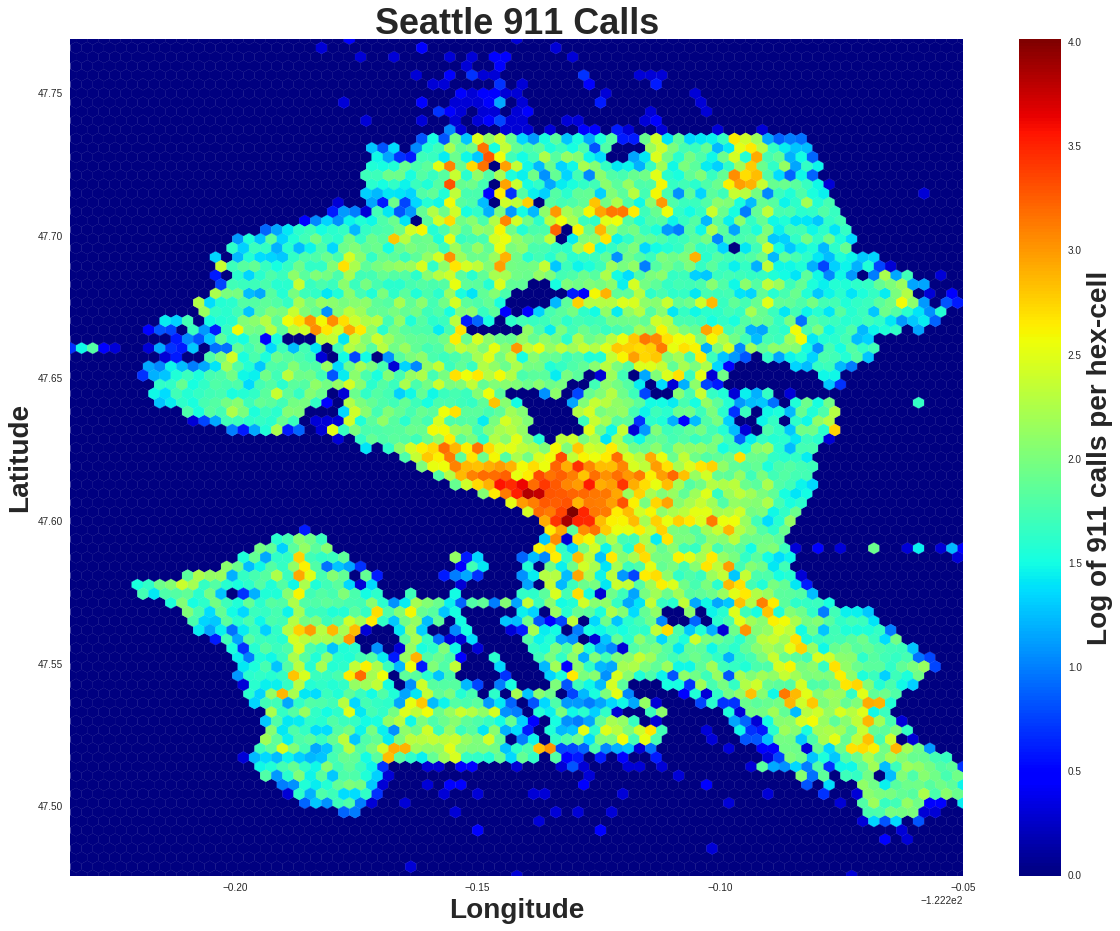

In [12]:
# Define axes for hexbin (3D histogram)
x = df.Longitude
y = df.Latitude

# Use log of counts for bins to reveal more structure  
plt.figure(figsize=(20,15))
plt.hexbin(x, y, gridsize=80, cmap=plt.cm.jet, bins='log')
plt.axis([x.min(), x.max(), y.min(), y.max()])

# Label axes and create plot title
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Calls', fontsize=36, fontweight='bold')

# Generate colormap scale and label, save plot
cb = plt.colorbar()
cb.set_label('Log of 911 calls per hex-cell', fontsize=28, fontweight='bold')
plt.savefig('seattle_911_hexlog.png') 

In [14]:
# Investigate very 'hot' hex in downtown Seattle
df = df[((df['Latitude'] < 47.62) & (df['Latitude'] > 47.60))]
df = df[((df['Longitude'] < -122.33) & (df['Longitude'] > -122.34))]

In [16]:
# Majority of activity medical responses
df.groupby('Type').size()

Type
1RED 1 Unit                      297
3RED - 1 +1 + 1                   12
4RED - 2 + 1 + 1                 144
AFA4 - Auto Alarm 2 + 1 + 1      171
ANTIB - Antibiotic Delivery        1
Activated CO Detector             31
Aid Response                   41645
Aid Response Freeway              29
Aid Response Yellow              328
Aid Service                        6
Alarm Bell                       163
Assault w/Weap 7 per Rule        190
Assault w/Weapons 14               8
Assault w/Weapons, Aid             5
Assault w/Weapons- Aid            35
Auto Fire Alarm                 4075
Automatic Fire Alarm False       198
Automatic Fire Alarm Resd          2
Automatic Medical Alarm          190
Bark Fire                         39
Boat Taking Water Minr/Sho         1
Boat Under 50' Fire Shore          1
Boat Under 50' Fire Water          3
Boat Under 50' Unknown             1
Brush Fire                        18
Brush Fire Freeway                 4
Car Fire                         